In [10]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import gc

import general_functions as gf

from keras.models import load_model


In [11]:
#clearing session
tf.keras.backend.clear_session()

In [12]:
#date in format YYYY-MM-DD
start_date='2019-08-10'
end_date='2019-09-30'
#coordinates of POI in WGS84
point_x='55' 
point_y='18'

In [13]:
crop_patch=1024 #width and height of a patch images
batch_size=2 #size of batch in a model

In [14]:
images=gf.get_images(start_date, end_date, point_x, point_y) #getting images from eodata that intersect point within a defined time interval

In [15]:
#model loading from path
model_path='/home/eouser/Desktop/oil_spills/unet_model_b2_e250_iall_esnon.h5'
model=load_model(model_path)

In [16]:
predicted_images=gf.predictions(images, model, crop_patch, batch_size) #masks prediction

225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step


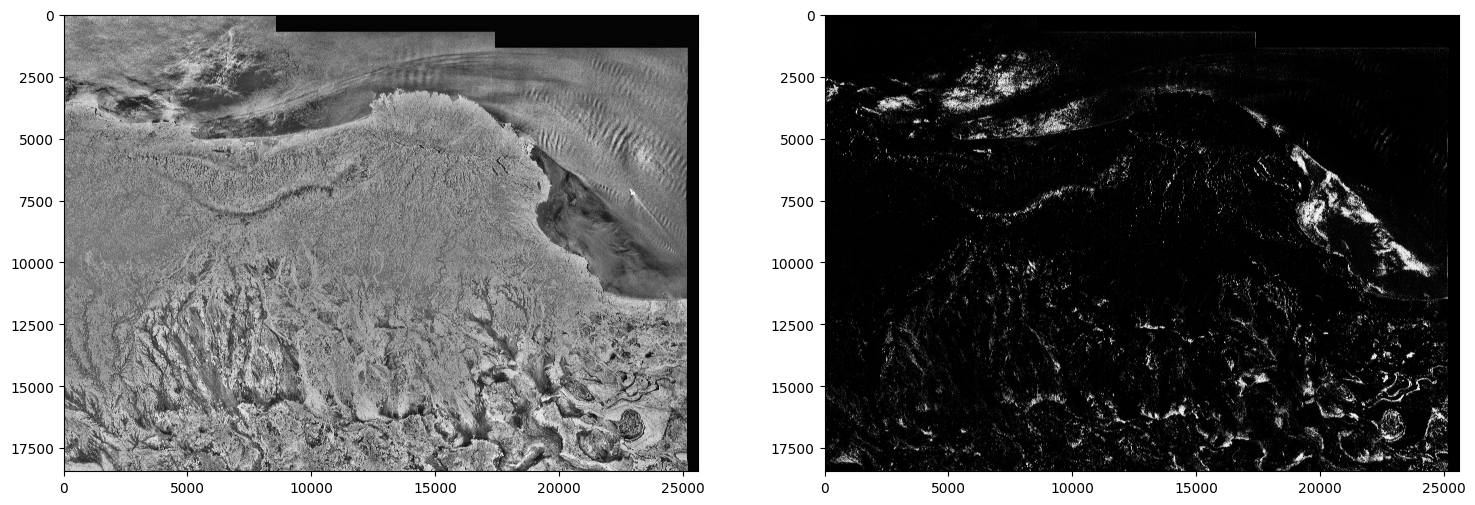

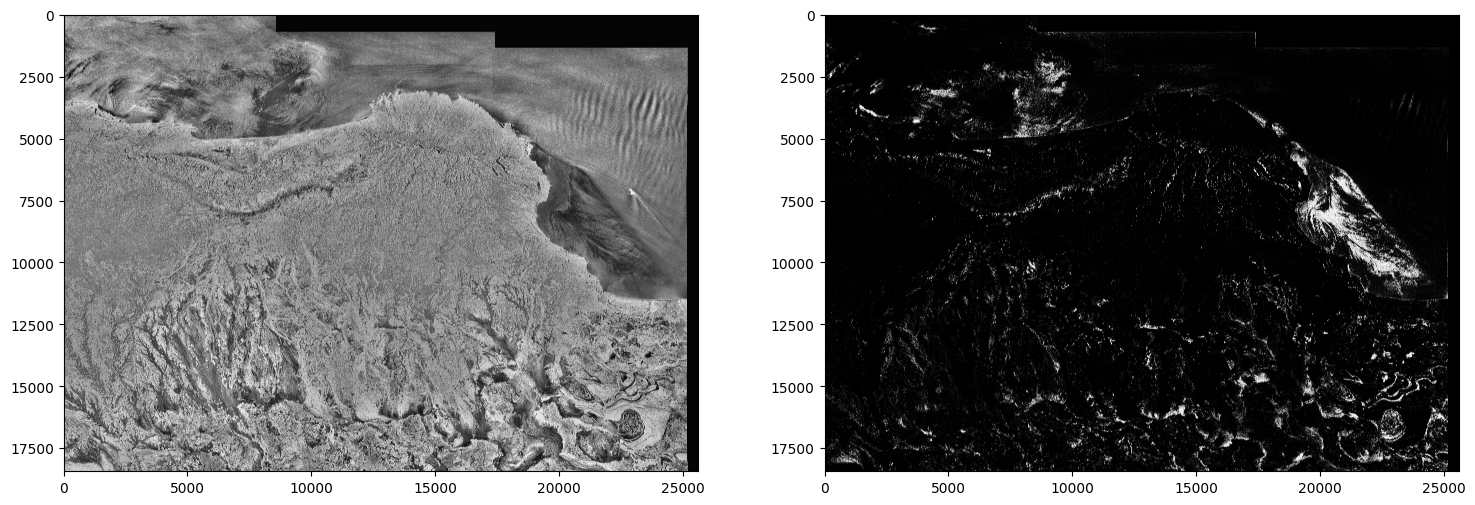

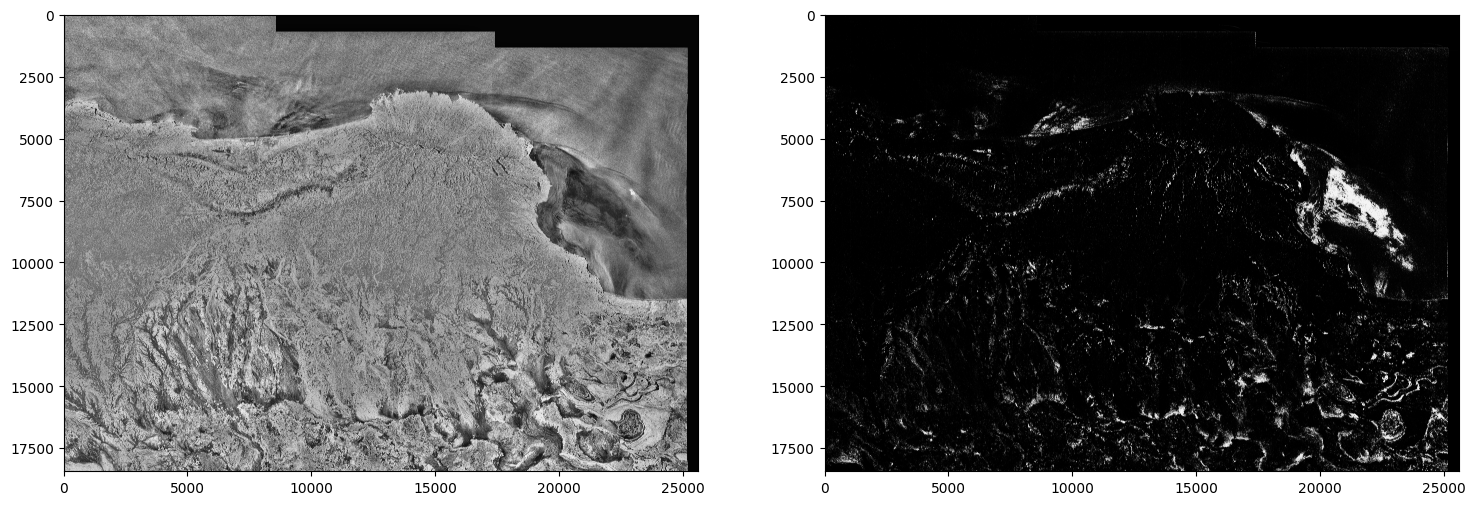

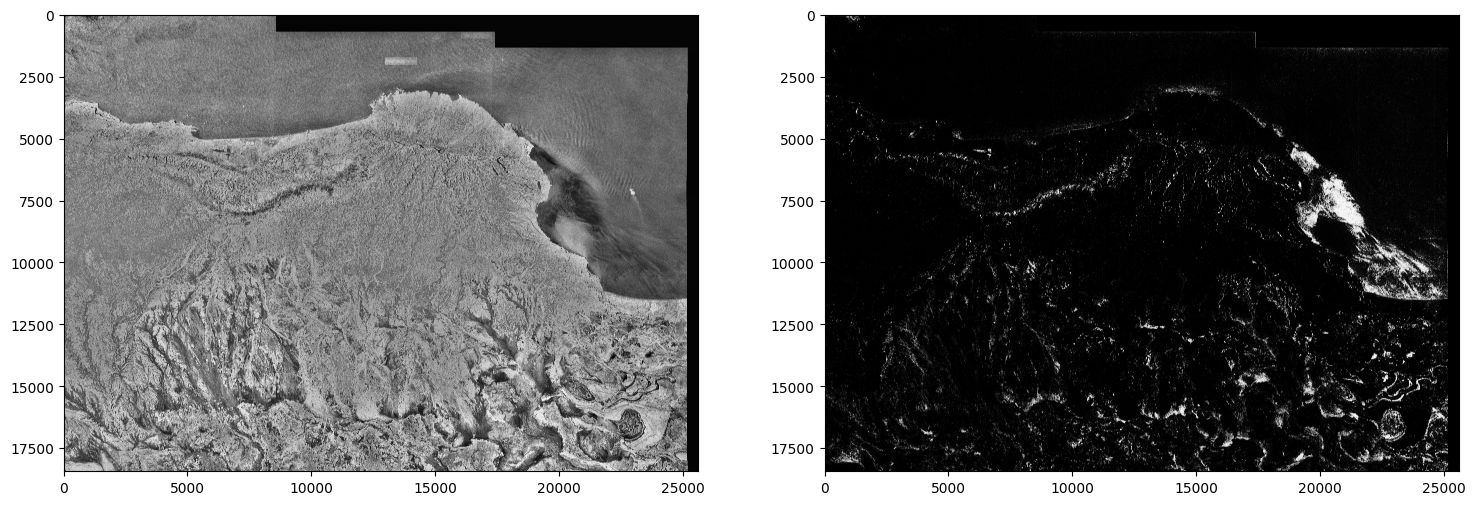

In [17]:
#plotting original images and masks
for pred_image, image in zip(predicted_images, images):
    plt.figure(figsize=(18, 9))
    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.subplot(122)
    plt.imshow(pred_image, cmap='gray')
    plt.show()

In [18]:
#clearing session
tf.keras.backend.clear_session()